In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 88805612810771517
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14474280960
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5107722976586920699
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


2021-10-07 11:57:38.996066: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-07 11:57:39.687615: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-07 11:57:39.813231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-07 11:57:39.813868: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [4]:
from os import listdir
from os.path import isfile, join
from shutil import copyfile
mypath="prep"
prep = [os.path.splitext(f)[0] for f in listdir(mypath) if isfile(join(mypath, f))]

In [5]:
df = pd.read_csv("train.csv")
df = df[["Id", "Pawpularity"]].set_index("Id").loc[prep]
df["Pawpularity"] = df["Pawpularity"]>=50
df["Pawpularity"].replace({True:1, False:0}, inplace=True)

In [7]:
batch_size = 16
img_height = 1280
img_width = 1280
data_dir="datatrain"

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5068 files belonging to 2 classes.
Using 4055 files for training.


2021-10-07 11:57:47.648553: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-07 11:57:47.649228: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-07 11:57:47.649775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-07 11:57:47.650623: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-07 11:57:47.651205: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5068 files belonging to 2 classes.
Using 1013 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['cute', 'notcute']


2021-10-07 11:34:57.498738: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


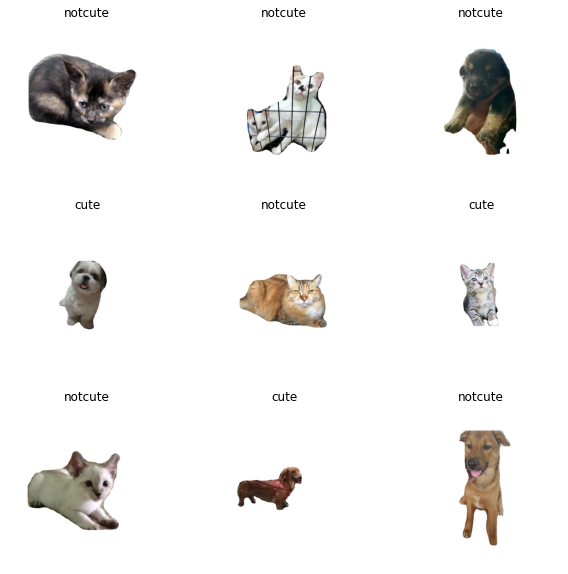

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
num_classes = 2

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 1280, 1280, 3)     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1280, 1280, 16)    448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 640, 640, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 640, 640, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 320, 320, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 320, 320, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 160, 160, 64)      0

In [15]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2021-10-03 13:28:08.753953: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 102 of 1000
2021-10-03 13:28:18.697595: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 205 of 1000
2021-10-03 13:28:23.394533: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.
2021-10-03 13:28:24.043098: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201


254/254 [==============================] - 146s 453ms/step - loss: 1.2771 - accuracy: 0.7687 - val_loss: 0.4958 - val_accuracy: 0.8124
Epoch 2/10
254/254 [==============================] - 109s 430ms/step - loss: 0.4943 - accuracy: 0.7778 - val_loss: 0.5327 - val_accuracy: 0.8075
Epoch 3/10
254/254 [==============================] - 109s 430ms/step - loss: 0.3097 - accuracy: 0.8708 - val_loss: 0.6673 - val_accuracy: 0.7680
Epoch 4/10
254/254 [==============================] - 109s 429ms/step - loss: 0.1076 - accuracy: 0.9571 - val_loss: 1.6621 - val_accuracy: 0.7927
Epoch 5/10
254/254 [==============================] - 109s 429ms/step - loss: 0.0512 - accuracy: 0.9845 - val_loss: 1.7829 - val_accuracy: 0.7720
Epoch 6/10
254/254 [==============================] - 109s 429ms/step - loss: 0.0207 - accuracy: 0.9938 - val_loss: 2.4559 - val_accuracy: 0.7522
Epoch 7/10
254/254 [==============================] - 109s 429ms/step - loss: 0.0088 - accuracy: 0.9973 - val_loss: 2.8760 - val_accura

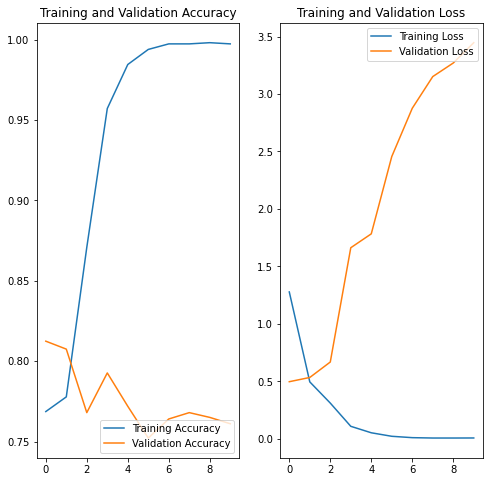

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [12]:
num_classes = 2
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])

In [13]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01
)

In [14]:
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
checkpoint_path = "training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [16]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    callbacks=[cp_callback]
)

Epoch 1/15


2021-10-07 11:59:23.180740: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-07 11:59:31.357203: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201


254/254 [==============================] - 183s 608ms/step - loss: 0.6250 - accuracy: 0.7494 - val_loss: 0.5136 - val_accuracy: 0.8124

Epoch 00001: saving model to training/cp.ckpt
Epoch 2/15
254/254 [==============================] - 152s 599ms/step - loss: 0.5536 - accuracy: 0.7741 - val_loss: 0.4840 - val_accuracy: 0.8124

Epoch 00002: saving model to training/cp.ckpt
Epoch 3/15
254/254 [==============================] - 152s 599ms/step - loss: 0.5580 - accuracy: 0.7662 - val_loss: 0.4827 - val_accuracy: 0.8124

Epoch 00003: saving model to training/cp.ckpt
Epoch 4/15
254/254 [==============================] - 152s 598ms/step - loss: 0.5677 - accuracy: 0.7628 - val_loss: 0.5134 - val_accuracy: 0.8124

Epoch 00004: saving model to training/cp.ckpt
Epoch 5/15
254/254 [==============================] - 152s 598ms/step - loss: 0.5580 - accuracy: 0.7741 - val_loss: 0.4838 - val_accuracy: 0.8124

Epoch 00005: saving model to training/cp.ckpt
Epoch 6/15
254/254 [==========================

In [17]:
model.save("model.tf")

2021-10-07 12:41:59.630566: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model.tf/assets


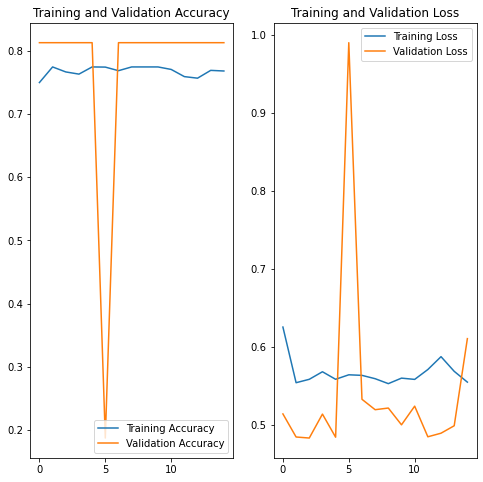

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)